In [ ]:
!pip install python-constraint



**LAB 06**

In [ ]:
#no var with same number
from constraint import *

# Define the problem
problem = Problem()

# Add variables to the problem
problem.addVariables(['a', 'b', 'c'], range(1, 4))

# Add constraints to the problem
problem.addConstraint(lambda a, b: a != b, ('a', 'b'))
problem.addConstraint(lambda b, c: b != c, ('b', 'c'))
problem.addConstraint(lambda a, c: a != c, ('a', 'c'))

# Solve the problem
solutions = problem.getSolutions()

# Print the solutions
for solution in solutions:
    print(solution)

{'a': 3, 'b': 2, 'c': 1}
{'a': 3, 'b': 1, 'c': 2}
{'a': 2, 'b': 3, 'c': 1}
{'a': 2, 'b': 1, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 3, 'c': 2}


In [ ]:
#no var with same color
from constraint import *

# Define the problem
problem = Problem()

# Add variables to the problem
problem.addVariables(['a', 'b', 'c'], ['red','green'])

# Add constraints to the problem
problem.addConstraint(lambda a, b: a != b, ('a', 'b'))
problem.addConstraint(lambda a, c: a != c, ('a', 'c'))

# Solve the problem
solutions = problem.getSolutions()

# Print the solutions
for solution in solutions:
    print(solution)


{'a': 'green', 'b': 'red', 'c': 'red'}
{'a': 'red', 'b': 'green', 'c': 'green'}


In [ ]:
#MIN MAX
import math

class Node:
    def __init__(self, value=None):
        self.value = value
        self.children = []
        self.minmax_value = None

def minmax(node, depth, maximizing_player=True):
    if depth == 0 or not node.children:
        return node.value

    if maximizing_player:
        value = -math.inf
        for child in node.children:
            child_value = minmax(child, depth-1, False)
            value = max(value, child_value)
        node.minmax_value = value
        return value
    else:
        value = math.inf
        for child in node.children:
            child_value = minmax(child, depth-1, True)
            value = min(value, child_value)
        node.minmax_value = value
        return value

# Sample tree
root = Node()
root.value = 'A'

n1 = Node('B')
n2 = Node('C')
root.children = [n1, n2]

n3 = Node('D')
n4 = Node('E')
n5 = Node('F')
n6 = Node('G')
n1.children = [n3, n4]
n2.children = [n5, n6]

n7 = Node(2)
n8 = Node(3)
n9 = Node(5)
n10 = Node(9)
n3.children = [n7, n8]
n4.children = [n9, n10]

n11 = Node(0)
n12 = Node(4)
n13 = Node(7)
n14 = Node(5)
n5.children = [n11, n12]
n6.children = [n13, n14]

# Example usage
minmax(root, 3)
print("Minimax values:")
print("A:", root.minmax_value)
print("B:", n1.minmax_value)
print("C:", n2.minmax_value)
print("D:", n3.minmax_value)
print("E:", n4.minmax_value)
print("F:", n5.minmax_value)
print("G:", n6.minmax_value)


Minimax values:
A: 4
B: 3
C: 4
D: 3
E: 9
F: 4
G: 7


In [ ]:
#Alpha Beta
import math

class Node:
    def __init__(self, value=None):
        self.value = value
        self.children = []
        self.minmax_value = None

def alpha_beta(node, depth, alpha, beta, maximizing_player=True):
    if depth == 0 or not node.children:
        return node.value

    if maximizing_player:
        value = -math.inf
        for child in node.children:
            value = max(value, alpha_beta(child, depth-1, alpha, beta, False))
            alpha = max(alpha, value)
            if beta <= alpha:
                print("Pruned node:", child.value)
                break
        node.minmax_value = value
        return value
    else:
        value = math.inf
        for child in node.children:
            value = min(value, alpha_beta(child, depth-1, alpha, beta, True))
            beta = min(beta, value)
            if beta < alpha:
                print("Pruned node:", child.value)
                break
        node.minmax_value = value
        return value

# Sample tree
root = Node()
root.value = 'A'

n1 = Node('B')
n2 = Node('C')
root.children = [n1, n2]

n3 = Node('D')
n4 = Node('E')
n5 = Node('F')
n6 = Node('G')
n1.children = [n3, n4]
n2.children = [n5, n6]

n7 = Node(2)
n8 = Node(3)
n9 = Node(5)
n10 = Node(9)
n3.children = [n7, n8]
n4.children = [n9, n10]

n11 = Node(0)
n12 = Node(2)
n13 = Node(7)
n14 = Node(5)
n5.children = [n11, n12]
n6.children = [n13, n14]

# Example usage
alpha_beta(root, 3, -math.inf, math.inf)
print("Minimax values:")
print("A:", root.minmax_value)
print("B:", n1.minmax_value)
print("C:", n2.minmax_value)
print("D:", n3.minmax_value)
print("E:", n4.minmax_value)
print("F:", n5.minmax_value)
print("G:", n6.minmax_value)


Pruned node: 5
Pruned node: F
Minimax values:
A: 3
B: 3
C: 2
D: 3
E: 5
F: 2
G: None


In [ ]:
#tic tac toe to tell the next best move
import math

class TicTacToe:
    def __init__(self, board):
        self.board = board

    def print_board(self):
        for row in self.board:
            print(" | ".join(row))
            print("-" * 9)

    def is_winner(self, player):
        # Check rows
        for row in self.board:
            if all(cell == player for cell in row):
                return True

        # Check columns
        for col in range(3):
            if all(self.board[row][col] == player for row in range(3)):
                return True

        # Check diagonals
        if all(self.board[i][i] == player for i in range(3)) or \
           all(self.board[i][2 - i] == player for i in range(3)):
            return True

        return False

    def is_full(self):
        return all(cell != ' ' for row in self.board for cell in row)

    def is_terminal(self):
        return self.is_winner('x') or self.is_winner('o') or self.is_full()

    def get_empty_cells(self):
        return [(i, j) for i in range(3) for j in range(3) if self.board[i][j] == ' ']

    def play_move(self, move, player):
        i, j = move
        self.board[i][j] = player

    def undo_move(self, move):
        i, j = move
        self.board[i][j] = ' '

def evaluate(board):
    if board.is_winner('x'):
        return 1
    elif board.is_winner('o'):
        return -1
    else:
        return 0

def minimax(board, depth, alpha, beta, maximizing_player=True):
    if depth == 0 or board.is_terminal():
        return evaluate(board)

    if maximizing_player:
        max_eval = -math.inf
        for move in board.get_empty_cells():
            board.play_move(move, 'x')
            eval = minimax(board, depth-1, alpha, beta, False)
            board.undo_move(move)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = math.inf
        for move in board.get_empty_cells():
            board.play_move(move, 'o')
            eval = minimax(board, depth-1, alpha, beta, True)
            board.undo_move(move)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta < alpha:
                break
        return min_eval

def find_best_move(board):
    best_eval = -math.inf
    best_move = None
    for move in board.get_empty_cells():
        board.play_move(move, 'x')
        eval = minimax(board, 5, -math.inf, math.inf, False)
        board.undo_move(move)
        if eval > best_eval:
            best_eval = eval
            best_move = move
    return best_move

# Initial board state
initial_board = [
    ['o', ' ', 'x'],
    ['x', ' ', ' '],
    ['x', 'o', 'o']
]

# Create the game object
game = TicTacToe(initial_board)

# Print the initial board
print("Initial Board:")
game.print_board()

# Find the best move
best_move = find_best_move(game)

# Print the best move
print("\nBest Move:", best_move)


Initial Board:
o |   | x
---------
x |   |  
---------
x | o | o
---------

Best Move: (1, 1)


In [ ]:
#tic tac toe to tell the next best move for the game
import math

class TicTacToe:
    def __init__(self):
        self.board = [[' ']*3 for _ in range(3)]

    def print_board(self):
        for row in self.board:
            print(" | ".join(row))
            print("-" * 9)

    def is_winner(self, player):
        # Check rows
        for row in self.board:
            if all(cell == player for cell in row):
                return True

        # Check columns
        for col in range(3):
            if all(self.board[row][col] == player for row in range(3)):
                return True

        # Check diagonals
        if all(self.board[i][i] == player for i in range(3)) or \
           all(self.board[i][2 - i] == player for i in range(3)):
            return True

        return False

    def is_full(self):
        return all(cell != ' ' for row in self.board for cell in row)

    def is_terminal(self):
        return self.is_winner('x') or self.is_winner('o') or self.is_full()

    def get_empty_cells(self):
        return [(i, j) for i in range(3) for j in range(3) if self.board[i][j] == ' ']

    def play_move(self, move, player):
        i, j = move
        self.board[i][j] = player

    def undo_move(self, move):
        i, j = move
        self.board[i][j] = ' '

def evaluate(board):
    if board.is_winner('x'):
        return 1
    elif board.is_winner('o'):
        return -1
    else:
        return 0

def minimax(board, depth, alpha, beta, maximizing_player=True):
    if depth == 0 or board.is_terminal():
        return evaluate(board)

    if maximizing_player:
        max_eval = -math.inf
        for move in board.get_empty_cells():
            board.play_move(move, 'x')
            eval = minimax(board, depth-1, alpha, beta, False)
            board.undo_move(move)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = math.inf
        for move in board.get_empty_cells():
            board.play_move(move, 'o')
            eval = minimax(board, depth-1, alpha, beta, True)
            board.undo_move(move)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta < alpha:
                break
        return min_eval

def find_best_move(board):
    best_eval = -math.inf
    best_move = None
    for move in board.get_empty_cells():
        board.play_move(move, 'x')
        eval = minimax(board, 5, -math.inf, math.inf, False)
        board.undo_move(move)
        if eval > best_eval:
            best_eval = eval
            best_move = move
    return best_move

def get_user_move(board, player):
    while True:
        try:
            i, j = map(int, input(f"Enter row and column for {player}: ").split())
            if board[i][j] == ' ':
                return i, j
            else:
                print("Cell already occupied! Try again.")
        except ValueError:
            print("Invalid input! Please enter row and column as integers.")
        except IndexError:
            print("Invalid input! Row and column should be between 0 and 2.")

# Create the game object
game = TicTacToe()

# Print the initial board
print("Initial Board:")
game.print_board()

# Game loop
while not game.is_terminal():
    # Get best move for 'x'
    best_move = find_best_move(game)
    print(f"\nBest Move for 'x': {best_move}")

    # Get user input for 'x'
    x_move = get_user_move(game.board, 'x')
    game.play_move(x_move, 'x')
    game.print_board()

    if game.is_terminal():
        break

    # Get best move for 'o'
    best_move = find_best_move(game)
    print(f"\nBest Move for 'o': {best_move}")

    # Get user input for 'o'
    o_move = get_user_move(game.board, 'o')
    game.play_move(o_move, 'o')
    game.print_board()

# Game result
if game.is_winner('x'):
    print("Congratulations! 'x' wins!")
elif game.is_winner('o'):
    print("Congratulations! 'o' wins!")
else:
    print("It's a draw!")

Initial Board:
  |   |  
---------
  |   |  
---------
  |   |  
---------

Best Move for 'x': (0, 0)
Enter row and column for x: 0 0
x |   |  
---------
  |   |  
---------
  |   |  
---------

Best Move for 'o': (0, 1)
Enter row and column for o: 0 1
x | o |  
---------
  |   |  
---------
  |   |  
---------

Best Move for 'x': (1, 0)
Enter row and column for x: 1 0
x | o |  
---------
x |   |  
---------
  |   |  
---------

Best Move for 'o': (0, 2)
Enter row and column for o: 0 2
x | o | o
---------
x |   |  
---------
  |   |  
---------

Best Move for 'x': (1, 1)
Enter row and column for x: 1 1
x | o | o
---------
x | x |  
---------
  |   |  
---------

Best Move for 'o': (1, 2)
Enter row and column for o: 1 2
x | o | o
---------
x | x | o
---------
  |   |  
---------

Best Move for 'x': (2, 0)
Enter row and column for x: 2 0
x | o | o
---------
x | x | o
---------
x |   |  
---------
Congratulations! 'x' wins!


In [ ]:
#N QUEEN
class NQueensCSP:
    def __init__(self, n):
        self.n = n
        self.variables = list(range(n))
        self.domain = {var: list(range(n)) for var in self.variables}
        self.constraints = {}

    def add_constraint(self, var1, var2):
        if var1 not in self.constraints:
            self.constraints[var1] = []
        self.constraints[var1].append(var2)

    def is_consistent(self, assignment, var, value):
        for neighbor in self.constraints.get(var, []):
            if neighbor in assignment and assignment[neighbor] == value:
                return False
            if neighbor in assignment and abs(neighbor - var) == abs(assignment[neighbor] - value):
                return False
        return True

    def backtracking_search(self):
        return self.backtrack({})

    def backtrack(self, assignment):
        if len(assignment) == self.n:
            return assignment

        var = self.select_unassigned_variable(assignment)
        for value in self.order_domain_values(var, assignment):
            if self.is_consistent(assignment, var, value):
                assignment[var] = value
                result = self.backtrack(assignment)
                if result is not None:
                    return result
                del assignment[var]
        return None

    def select_unassigned_variable(self, assignment):
        unassigned_vars = [var for var in self.variables if var not in assignment]
        return min(unassigned_vars, key=lambda var: len(self.constraints.get(var, [])))

    def order_domain_values(self, var, assignment):
        return self.domain[var]

    def print_solution(self, assignment):
        board = [['.' for _ in range(self.n)] for _ in range(self.n)]
        for var, value in assignment.items():
            board[value][var] = 'Q'
        for row in board:
            print(' '.join(row))

if __name__ == "__main__":
    n = int(input());
    csp = NQueensCSP(n)
    for i in range(n):
        for j in range(i+1, n):
            csp.add_constraint(i, j)
            csp.add_constraint(j, i)
    solution = csp.backtracking_search()
    if solution is not None:
        csp.print_solution(solution)
    else:
        print("No solution exists!")


3
No solution exists!


In [ ]:
# Taking input for a 2D array with validation

# Specify the dimensions of the array
rows = int(input("Enter the number of rows: "))
cols = int(input("Enter the number of columns: "))

# Initialize an empty 2D array
matrix = []

# Iterate over each row
for i in range(rows):
    # Take input for each row as a list of integers
    while True:
        row = input(f"Enter space-separated elements for row {i + 1}: ").split()
        if len(row) == cols:
            break
        else:
            print(f"Number of elements must be {cols}. Please enter again.")

    # Convert elements to integers and append the row to the matrix
    matrix.append([int(element) for element in row])

# Display the 2D array
print("The 2D array is:")
for row in matrix:
    for element in row:
        print(element, end=" ")  # Print each element separated by a space
    print()  # Move to the next line after printing each row


Enter the number of rows: 3
Enter the number of columns: 3
Enter space-separated elements for row 1: 1 2 3 4 
Number of elements must be 3. Please enter again.
Enter space-separated elements for row 1: 1 2 3
Enter space-separated elements for row 2: 1 2 3
Enter space-separated elements for row 3: 1 2 3
The 2D array is:
1 2 3 
1 2 3 
1 2 3 


In [ ]:
#Cryptarithemtic Problem
from itertools import permutations

def is_solution(words, mapping):
    # Convert words to numbers using the mapping
    numbers = [int(''.join(str(mapping[c]) for c in word)) for word in words]
    return sum(numbers[:-1]) == numbers[-1]

def solve_cryptarithmetic(words):
    letters = set(''.join(words))
    if len(letters) > 10:
        return None  # No solution is possible

    # Generate all possible permutations of 0-9 for the letters
    for perm in permutations(range(10), len(letters)):
        mapping = {letter: digit for letter, digit in zip(letters, perm)}
        if mapping[words[0][0]] == 0 or mapping[words[1][0]] == 0 or mapping[words[2][0]] == 0:
            continue  # Skip permutations where any word starts with 0
        if is_solution(words, mapping):
            return mapping
    return None  # No solution found

# Input words
word1 = input("Enter the first word: ").upper()
word2 = input("Enter the second word: ").upper()
word3 = input("Enter the result word: ").upper()

# Solve the cryptarithmetic problem
solution = solve_cryptarithmetic([word1, word2, word3])

if solution:
    print("Solution found:")
    for letter, digit in solution.items():
        print(f"{letter} = {digit}")
else:
    print("No solution found")


Enter the first word: SEND
Enter the second word: MORE
Enter the result word: MONEY
Solution found:
E = 5
M = 1
Y = 2
S = 9
D = 7
O = 0
R = 8
N = 6


**LAB 07**

There are 52 cards In a standard deck of cards and of those 52 cards, 4 are Aces. If you follow the example of the coin flipping from above to know the probability of drawing an Ace, you'll divide the number of possible event outcomes (4), by the sample space (52)

In [ ]:
import numpy as np
import pandas as pd

# Sample Space
cards	=	52 #Outcomes
aces = 4
# Divide possible outcomes by the sample set
ace_probability = aces / cards
# Print probability rounded to two decimal places
print(round(ace_probability, 2))
# Ace Probability Percent Code
ace_probability_percent = ace_probability * 100
# Print probability percent rounded to one decimal place
print(str(round(ace_probability_percent, 0)) + '%')

0.08
8.0%


In [ ]:
import numpy as np # linear algebra
import pandas as pd

def event_probability(event_outcomes, sample_space):
  probability = (event_outcomes / sample_space) *100
  return round(probability, 1)
# Sample Space
cards = 52
# Determine the probability of drawing a heart
hearts = 13
heart_probability = event_probability(hearts, cards)
# Determine the probability of drawing a face card
face_cards = 12
face_card_probability = event_probability(face_cards, cards)
# Determine the probability of drawing the queen of hearts
queen_of_hearts = 1
queen_of_hearts_probability = event_probability(queen_of_hearts, cards)
# Print each probability
print("Probability of Heart :- ",str(heart_probability) + '%')
print("Probability of Face Card :- ",str(face_card_probability) + '%')
print("Probability of Queen of Hearts :- ",str(queen_of_hearts_probability) + '%')

Probability of Heart :-  25.0%
Probability of Face Card :-  23.1%
Probability of Queen of Hearts :-  1.9%


**POMEGRANATE**

In [ ]:
!pip install pomegranate==v0.14.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for pomegranate: filename=pomegranate-0.14.9-cp310-cp310-linux_x86_64.whl size=18331481 sha256=240841741f954f318ae663518f49987eaa0f3fd30663a81823e138bbf58fd77c
  Stored in directory: /root/.cache/pip/wheels/14/e7/b2/189a2d351ac4ae073cfa17ce9d56936d59af5712a18028fc31
Successfully built pomegranate
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


Step 1 : create DiscreteDistrubution of Main (Parent Nodes)

step 2 : Create Conditional Probability Table for childs

step 3 : Create Nodes (variables)

step 4 : Adding Nodes to the network

step 5 : Connect nodes with edges

step 6 : Compelete the Network Structure

In [ ]:
#Import required packages
import math
from pomegranate import *
# Initially the door selected by the guest is completely random
guest =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
# The door containing the prize is also a random process
prize =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
# The door Monty picks, depends on the choice of the guest and the prize door
monty =ConditionalProbabilityTable( [[ 'A','A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] )
d1 = State( guest, name="guest" )
d2 = State( prize, name="prize" )
d3 = State( monty, name="monty" )
#Building the Bayesian Network
network = BayesianNetwork( "Solving the Monty Hall Problem With Bayesian Networks" )
network.add_states(d1, d2, d3)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.bake()                #network structure
beliefs = network.predict_proba({ 'guest' : 'A' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))
beliefs = network.predict_proba({'guest' : 'A', 'monty' : 'B'})
print("n".join( "{}t{}".format( state.name, str(belief) )
for state, belief in zip( network.states, beliefs )))


guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333333,
            "B" : 0.3333333333333333,
            "C" : 0.3333333333333333
        }
    ],
    "frozen" : false
}nmontyt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.0,
            "C" : 0.49999999999999983,
            "B" : 0.49999999999999983
        }
    ],
    "frozen" : false
}
guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333334,
            "B" : 0.0,
            "C" : 0.6666666666666664
        }
    ],
    "frozen" : false
}nmontytB


Baysian Model Using PGMPY

In [ ]:
!pip install pgmpy

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianNetwork([("C", "H"), ("P", "H")])

# Defining the CPDs:
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Some other methods
model.get_cpds()

# check_model check for the model structure and the associated CPD and returns True if everything is correct otherwise throws an exception
model.check_model()

# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


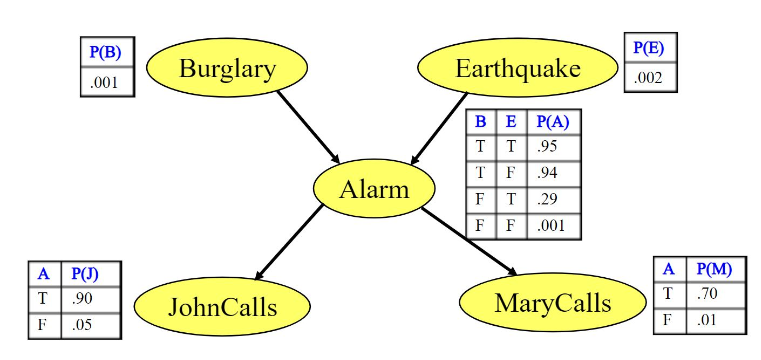

In [ ]:
from pomegranate import *

# Define the states
burglary = DiscreteDistribution({'True': 0.001, 'False': 0.999})
earthquake = DiscreteDistribution({'True': 0.002, 'False': 0.998})
alarm = ConditionalProbabilityTable(
    [['True', 'True', 'True', 0.95], # B=true , E=true , Alarm = True
     ['True', 'True', 'False', 0.05], # B=true , E=true , Alarm = False
     ['True', 'False', 'True', 0.94],   # B=true , E=false , Alarm = True
     ['True', 'False', 'False', 0.06],  # B=true , E=false , Alarm = True
     ['False', 'True', 'True', 0.29],
     ['False', 'True', 'False', 0.71],
     ['False', 'False', 'True', 0.001],
     ['False', 'False', 'False', 0.999]],
    [burglary, earthquake]
)
david_calls = ConditionalProbabilityTable(
    [['True', 'True', 0.9],  # john = True , Alarm = true
     ['True', 'False', 0.1], # john = True , Alarm = false
     ['False', 'True', 0.05],  # john = False , Alarm = true
     ['False', 'False', 0.95]],  # john = False , Alarm = false
    [alarm]
)
sophia_calls = ConditionalProbabilityTable(
    [['True', 'True', 0.7],  # sophia = True , Alarm = true
     ['True', 'False', 0.3], # sophia = True , Alarm = false
     ['False', 'True', 0.01], # sophia = False , Alarm = true
     ['False', 'False', 0.99]],# sophia = False , Alarm = false
    [alarm]
)

# Define the nodes
s1 = State(burglary, name="burglary")   #creating nodes(variables)
s2 = State(earthquake, name="earthquake")
s3 = State(alarm, name="alarm")
s4 = State(david_calls, name="david_calls")
s5 = State(sophia_calls, name="sophia_calls")

# Create the Bayesian network
network = BayesianNetwork("Burglary Alarm")
network.add_states(s1, s2, s3, s4, s5)  #adding nodes(variables) to the network
network.add_edge(s1, s3)  #adding edges to connect nodes
network.add_edge(s2, s3)
network.add_edge(s3, s4)
network.add_edge(s3, s5)
network.bake()            #network structure

# Calculate the probability of the alarm given burglary
prob_alarm_given_burglary = network.predict_proba({'burglary': 'False'})[2].parameters[0]['True']
print("Probability of Alarm given Burglary:", prob_alarm_given_burglary)


Probability of Alarm given Burglary: 0.0015780000000007283


**HMMLEARN**

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
import numpy as np

# Define the model
model = hmm.MultinomialHMM(n_components=2, n_iter=100)

# Define the transition probabilities
model.transmat_ = np.array([[0.8, 0.2],  # Transition probabilities for drinks vending machine
                            [0.6, 0.4]]) # Transition probabilities for snacks vending machine

# Define the emission probabilities
model.emissionprob_ = np.array([[0.1, 0.4, 0.5],  # Emission probabilities for drinks vending machine
                                [0.7, 0.2, 0.1]]) # Emission probabilities for snacks vending machine

# Define the starting probabilities
model.startprob_ = np.array([0.6, 0.4])  # Starting probabilities for both vending machines

# Define the observed sequence
observed_sequence = np.array([0, 1, 0, 0, 1])  # Sales data for a week (0 represents low demand, 1 represents high demand)

# Fit the model to the observed sequence
model.fit(observed_sequence.reshape(-1, 1))

# Print the model parameters
print("Transition probabilities:")
print(model.transmat_)
print("\nEmission probabilities:")
print(model.emissionprob_)
print("\nStarting probabilities:")
print(model.startprob_)

# Infer the hidden state sequence of the observed sequence
hidden_states = model.predict(observed_sequence.reshape(-1, 1))
print("\nHidden state sequence:")
print(hidden_states)




https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Transition probabilities:
[[0.77227399 0.22772601]
 [0.333523   0.666477  ]]

Emission probabilities:
[[1.]
 [1.]]

Starting probabilities:
[3.50095009e-04 9.99649905e-01]

Hidden state sequence:
[1 1 1 1 1]


**TASKS LAB 07**

In [ ]:
#Task 01
# A manufacturing firm employs three analytical plans for the design and development of a particular
# product. For cost reasons, all three are used at varying times. In fact, plans 1, 2, and 3 are used
# for 30%, 20%, and 50% of the products, respectively. The defect rate is different for the three
# procedures as follows: P(D|P1)=0.01, P(D|P2)=0.03, P(D|P3)=0.02, where P(D|Pj ) is the probability
# of a defective product, given plan j. If a random product
# was observed and found to be defective, which plan was most likely used and thus responsible?

# Task 01
# Probability of each plan being used
P_P1 = 0.30
P_P2 = 0.20
P_P3 = 0.50

# Probability of defect given each plan
P_D_given_P1 = 0.01
P_D_given_P2 = 0.03
P_D_given_P3 = 0.02

# Total probability of defect
P_D = P_P1 * P_D_given_P1 + P_P2 * P_D_given_P2 + P_P3 * P_D_given_P3

# Probability of each plan given defect using Bayes' Theorem
P_P1_given_D = (P_P1 * P_D_given_P1) / P_D
P_P2_given_D = (P_P2 * P_D_given_P2) / P_D
P_P3_given_D = (P_P3 * P_D_given_P3) / P_D

# Output
print("Probability of defect given each plan:")
print("P(D|P1) =", P_D_given_P1)
print("P(D|P2) =", P_D_given_P2)
print("P(D|P3) =", P_D_given_P3)
print("\nTotal probability of defect: P(D) =", P_D)
print("\nProbability of each plan given defect:")
print("P(P1|D) =", P_P1_given_D)
print("P(P2|D) =", P_P2_given_D)
print("P(P3|D) =", P_P3_given_D)

# Plan with the highest probability
max_prob_plan = max(P_P1_given_D, P_P2_given_D, P_P3_given_D)
if max_prob_plan == P_P1_given_D:
    print("\nPlan 1 was most likely responsible.")
elif max_prob_plan == P_P2_given_D:
    print("\nPlan 2 was most likely responsible.")
else:
    print("\nPlan 3 was most likely responsible.")



Probability of defect given each plan:
P(D|P1) = 0.01
P(D|P2) = 0.03
P(D|P3) = 0.02

Total probability of defect: P(D) = 0.019000000000000003

Probability of each plan given defect:
P(P1|D) = 0.15789473684210525
P(P2|D) = 0.3157894736842105
P(P3|D) = 0.5263157894736842

Plan 3 was most likely responsible.


In [ ]:
# Task 02
# Sarah is a plant manager at a manufacturing facility. She's concerned about two potential issues
# that could affect production: a malfunction in one of the machines or a power outage in the area.
# Sarah relies on two employees, Alex and Emily, to notify her if either event occurs. Alex is
# diligent and always calls Sarah when he notices a machine malfunction, but occasionally he
# confuses the sound of the machine with other noises in the factory and calls mistakenly.
# Emily, on the other hand, tends to get engrossed in her work and sometimes misses the sound
# of the machine malfunctioning.
# Given this scenario, we want to calculate the probability of a Machine Malfunction Alarm.

def machine_malfunction_probability(q, r):
    """
    Calculate the probability of receiving a correct machine malfunction alarm.

    Parameters:
        q (float): Probability of mistaken call by Alex.
        r (float): Probability that Emily misses the sound of malfunction.

    Returns:
        float: Probability of receiving a correct machine malfunction alarm.
    """
    # Probability of correct alarm by Alex
    p_alex = 1 - q

    # Probability of correct alarm by Emily
    p_emily = 1 - r

    # Probability of receiving a correct machine malfunction alarm
    p_alarm = 1 - (1 - p_alex) * (1 - p_emily)

    return p_alarm

# Example probabilities for mistaken call by Alex and Emily missing the malfunction sound
q = 0.1  # Probability of mistaken call by Alex
r = 0.2  # Probability that Emily misses the sound of malfunction

# Calculate the probability of receiving a correct machine malfunction alarm
probability = machine_malfunction_probability(q, r)
print("Probability of receiving a correct machine malfunction alarm:", probability)




Probability of Machine Malfunction Alarm: 0.995


In [ ]:
!pip install --force-reinstall pomegranate
!pip install --upgrade TBB
!pip show TBB

In [ ]:
from pomegranate import *

# Define the distributions for each box
box1 = DiscreteDistribution({'gold': 2, 'silver': 0})
box2 = DiscreteDistribution({'gold': 0, 'silver': 2})
box3 = DiscreteDistribution({'gold': 1, 'silver': 1})

# Define the conditional probability tables for each box
cpt1 = ConditionalProbabilityTable(
    [['gold', 'gold', 1.0],
     ['gold', 'silver', 0.0],
     ['silver', 'gold', 0.0],
     ['silver', 'silver', 1.0]], [box1])

cpt2 = ConditionalProbabilityTable(
    [['gold', 'gold', 0.0],
     ['gold', 'silver', 1.0],
     ['silver', 'gold', 1.0],
     ['silver', 'silver', 0.0]], [box2])

cpt3 = ConditionalProbabilityTable(
    [['gold', 'gold', 0.5],
     ['gold', 'silver', 0.5],
     ['silver', 'gold', 0.5],
     ['silver', 'silver', 0.5]], [box3])

# Define the states and create the Bayesian networks
s1 = State(box1, name="box1")
s2 = State(box2, name="box2")
s3 = State(box3, name="box3")

c1 = State(cpt1, name="cpt1")
c2 = State(cpt2, name="cpt2")
c3 = State(cpt3, name="cpt3")

network = BayesianNetwork("Coin Boxes")
network.add_states(s1, s2, s3, c1, c2, c3)
network.add_edge(s1, c1)
network.add_edge(s2, c2)
network.add_edge(s3, c3)
network.bake()

# Observations
observations = {'box1': 'gold', 'box2': 'gold', 'box3': 'gold'}

# Calculate the probabilities
for state in network.states:
    if state.name.startswith('cpt'):
        box_state = state.name.replace('cpt', 'box')
        coin = observations[box_state]
        state.distribution.parameters[0][0][coin] = 1.0
        state.distribution.parameters[0][1][coin] = 0.0

beliefs = network.predict_proba(observations)
for state, belief in zip(network.states, beliefs):
    if state.name.startswith('cpt'):
        box_state = state.name.replace('cpt', 'box')
        print(f"Probability that the other coin in {box_state} is gold:", belief.parameters[0][0]['gold'])


TypeError: list indices must be integers or slices, not str

In [ ]:
# Task 04
from hmmlearn import hmm
import numpy as np

solar_sales = [10, 15, 20, 12, 18]
wind_sales = [8, 10, 12, 9, 11]

sales_data_array = np.column_stack((solar_sales, wind_sales))

states = ['high_demand', 'low_demand']
observations = ['sales']

n_states = len(states)
n_observations = len(observations)

transition_matrix = np.ones((n_states, n_states)) / n_states
emission_matrix = np.ones((n_states, n_observations)) / n_observations

model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix
model.fit(sales_data_array)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_components=2, n_trials=array([18, 25, 32, 21, 29]),
               random_state=RandomState(MT19937) at 0x7AFD85B56140)

In [ ]:
# Task 05
from hmmlearn import hmm
import numpy as np

clothing_data = np.array([[0], [0], [1], [1], [0], [1], [1]])

states = ['sunny', 'rainy']

n_states = len(states)
transition_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])
emission_matrix = np.array([[0.8, 0.2], [0.3, 0.7]])

model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix
model.fit(clothing_data)

predicted_weather_sequence = model.predict(clothing_data)
print("Predicted weather sequence:", [states[state] for state in predicted_weather_sequence])


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Predicted weather sequence: ['rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy']


**LAB08**

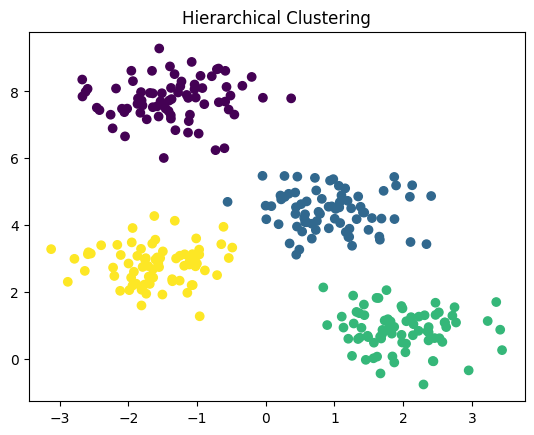

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels = agg_clustering.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


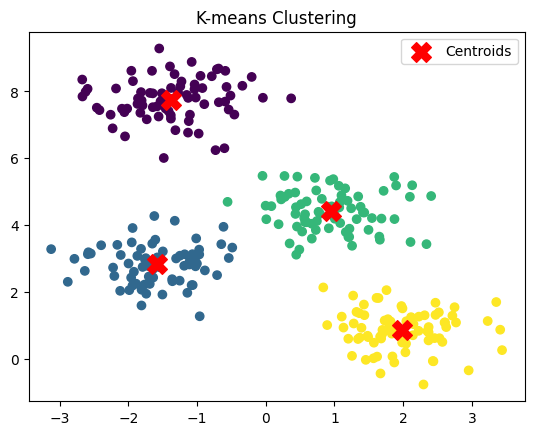

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform K-means Clustering
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.legend()
plt.show()


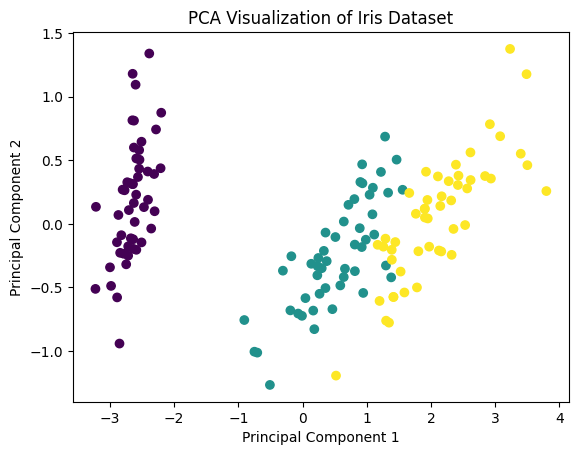

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA for visualization (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


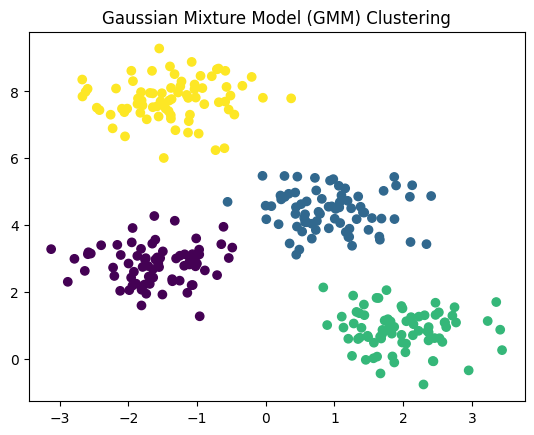

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=4)
labels = gmm.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.show()


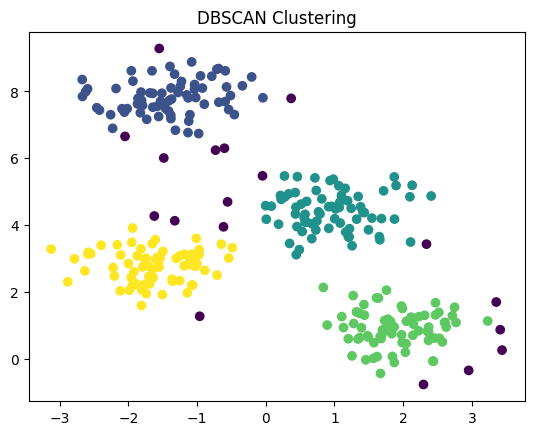

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the clusters (including noise points)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


In [ ]:
#item set frequency APRIORI
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Sample transaction dataset (list of lists)
dataset = [['bread', 'milk', 'eggs'],
           ['bread', 'butter'],
           ['milk', 'butter'],
           ['bread', 'milk', 'butter'],
           ['bread', 'milk']]

# One-hot encode the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
print(frequent_itemsets)


   support         itemsets
0      0.8          (bread)
1      0.6         (butter)
2      0.8           (milk)
3      0.4  (bread, butter)
4      0.6    (bread, milk)
5      0.4   (butter, milk)


In [ ]:
# item set frequency FP GROWTH
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Sample transaction dataset (list of lists)
dataset = [['bread', 'milk', 'eggs'],
           ['bread', 'butter'],
           ['milk', 'butter'],
           ['bread', 'milk', 'butter'],
           ['bread', 'milk']]

# One-hot encode the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(df, min_support=0.4, use_colnames=True)
print(frequent_itemsets)


   support         itemsets
0      0.8           (milk)
1      0.8          (bread)
2      0.6         (butter)
3      0.6    (bread, milk)
4      0.4  (bread, butter)
5      0.4   (butter, milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**TASKS 08**

In [ ]:
# Tasks
# Task01
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluation
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("\nClassification Report:")
print(classification_report(y_test, log_reg_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))

print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression Model:
Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[39  4]
 [ 1 70]]

Decision Tree Model:
Accuracy: 0.9385964912280702

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix:
[[39  4]
 [ 3 68]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation
print("Linear Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))

print("\nRandom Forest Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


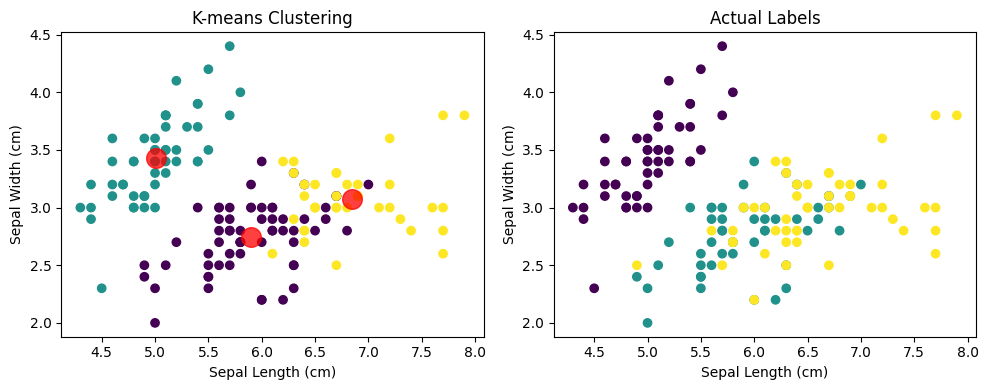

In [ ]:
# Task03
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Actual Labels')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


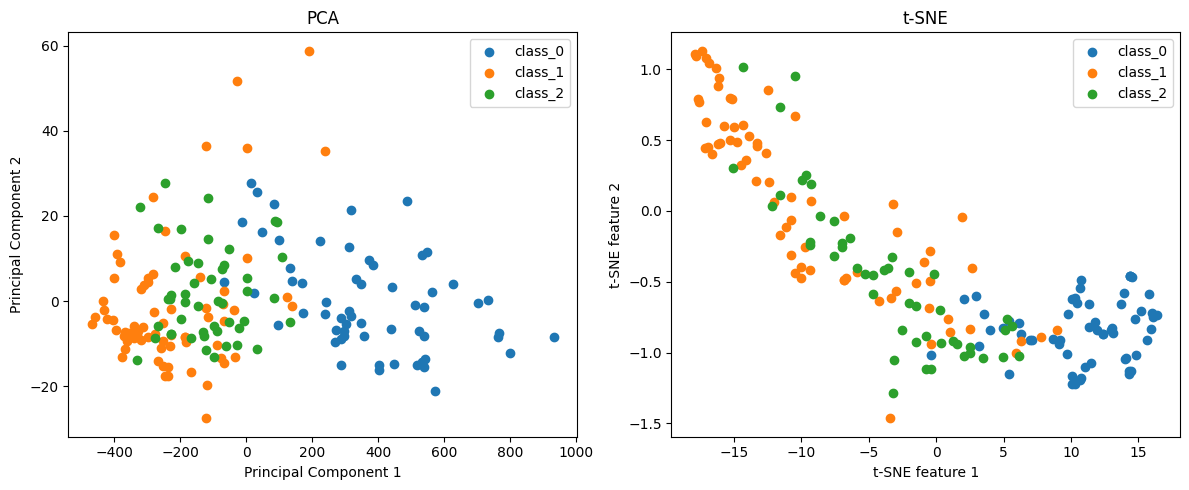

In [ ]:
# Task 04
# Importing necessary libraries
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the reduced-dimensional data (PCA)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(len(data.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=data.target_names[i])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Visualize the reduced-dimensional data (t-SNE)
plt.subplot(1, 2, 2)
for i in range(len(data.target_names)):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=data.target_names[i])
plt.title('t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Advanced Tasks
# 1
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) classifier
svm = SVC()

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the tuned model on a hold-out test set
tuned_model = grid_search.best_estimator_
tuned_pred = tuned_model.predict(X_test)

# Evaluation of the tuned model
print("\nTuned Model:")
print("Accuracy:", accuracy_score(y_test, tuned_pred))
print("\nClassification Report:")
print(classification_report(y_test, tuned_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tuned_pred))

# Evaluate the default model
default_model = SVC()
default_model.fit(X_train, y_train)
default_pred = default_model.predict(X_test)

# Evaluation of the default model
print("\nDefault Model:")
print("Accuracy:", accuracy_score(y_test, default_pred))
print("\nClassification Report:")
print(classification_report(y_test, default_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, default_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 2
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual base models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=10000, random_state=42)

# Ensemble model (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation of the ensemble model (Random Forest)
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Evaluation of individual base models
print("\nDecision Tree Model:")
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

print("\nLogistic Regression Model:")
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred))


In [ ]:
# 3
# Importing necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image

# Title
st.title("Flower Classification")

# Load the dataset
@st.cache
def load_data():
    data = pd.read_csv("flowers.csv")
    return data

# Load the dataset
data = load_data()

# Display the dataset
if st.checkbox("Show Dataset"):
    st.write(data)

# Select features and target variable
X = data.drop(columns=['label'])
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
st.subheader("Model Training")

# Model Selection
model = RandomForestClassifier()

# Training the model
model.fit(X_train, y_train)

# Model Evaluation
st.subheader("Model Evaluation")

# Prediction
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
st.write("Accuracy:", accuracy)

# Classification Report
st.write("Classification Report:")
st.write(classification_report(y_test, y_pred))

# Confusion Matrix
st.write("Confusion Matrix:")
st.write(confusion_matrix(y_test, y_pred))

# Prediction
st.subheader("Make a Prediction")

# Upload Image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Resize the image to the same size as used for training (if necessary)
    # image = image.resize((64, 64))

    # Convert image to numpy array
    image_array = np.array(image)

    # Flatten the image array
    image_flattened = image_array.flatten()

    # Make prediction
    prediction = model.predict([image_flattened])

    # Display prediction
    st.write("Prediction:", prediction[0])


**LAB09**

In [ ]:
!pip install numpy
!pip install gym


Step 1: Create the environment
Step 2: Create the Q-table and initialize it 🗄️
Step 3: Create the hyperparameters
Step 4: The Q learning algorithm 🧠
Step 5: Use our Q-table to play FrozenLake ! 👾

In [ ]:
import numpy as np
import gym
import random

In [ ]:
env = gym.make("FrozenLake-v1")

action_size = env.action_space.n
state_size = env.observation_space.n

# Create our Q table with state_size rows and action_size columns (64x4)
qtable = np.zeros((state_size, action_size))
print(qtable)

total_episodes = 20000       # Total episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.7                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.5            # Exponential decay rate for exploration prob

# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            #print("action random", action)


        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)


print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)


env.reset()

for episode in range(10):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)

        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            #env.render()
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            # We print the number of step it took.
            print("Number of steps", step)

            break
        state = new_state
env.close()



The SARSA learning algorithm 🧠

In [ ]:
import random

import gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make('FrozenLake-v1')
print("Action space:", env.action_space)
#print("State space:", env.env.nS)

env.env.P

In [ ]:
state_size = 16
action_space = env.action_space.n
alpha = 0.5
gamma = 0.7
state_action_vals = np.random.randn(state_size, action_space)
policy = np.zeros(state_size, dtype=int)
episodes = 20000
eps = 1
test_episodes = 50
test_every = 1000
test_episode = []
rewards = []


def select_action(state, eps):
    sample = np.random.uniform()
    if sample < eps:
        return env.action_space.sample()
    else:
        return state_action_vals[state].argmax()





for ep in range(episodes):
    state = env.reset()
    action = select_action(state, eps)
    done = False
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = select_action(state, eps)

        action_value = state_action_vals[state, action]
        next_action_value = state_action_vals[next_state, next_action]
        delta = reward + gamma * next_action_value - action_value
        state_action_vals[state, action] += alpha * delta
        state, action = next_state, next_action





    if ep % test_every == 0:
        total_rewards = 0
        for _ in range(test_episodes):
            done = False
            state = env.reset()
            while not done:
                action = state_action_vals[state].argmax()
                state, reward, done, _ = env.step(action)
                total_rewards += reward
        rewards.append(total_rewards / test_episodes)
        test_episode.append(ep)





fig, ax = plt.subplots()
ax.plot(test_episode, rewards)
ax.set_title('Episodes vs average rewards')
ax.set_xlabel('Episode')
_ = ax.set_ylabel('Average reward')



Example
This code implements Q-learning to solve the CartPole-v1 environment from OpenAI Gym, where the goal is to balance a pole on a cart by applying left or right forces.

The provided code demonstrates a basic implementation of Q-learning with function approximation (discretization of state space) to solve the CartPole-v1 environment. It follows the standard Q-learning algorithm:

Initializes the Q-table.
Implements Q-learning updates based on observed state transitions and rewards.
Uses an ε-greedy policy for balancing exploration and exploitation.
Decays the exploration rate over episodes.
Collects and plots rewards to visualize the agent's learning progress.

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Parameters for Q-learning
num_episodes = 1000
max_steps_per_episode = 200
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

# Discretization parameters for state space
num_buckets = (1, 1, 6, 12)  # Number of buckets for each feature in state space
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-np.radians(50), np.radians(50)]

# Initialize Q-table
action_space_size = env.action_space.n
q_table = np.zeros(num_buckets + (action_space_size,))

# Function to discretize the continuous state into discrete buckets
def discretize_state(state):
    discretized_state = []
    for i in range(len(state)):
        scaling = (state[i] + abs(state_bounds[i][0])) / (state_bounds[i][1] - state_bounds[i][0])
        bucket = int(round((num_buckets[i] - 1) * scaling))
        discretized_state.append(min(num_buckets[i] - 1, max(0, bucket)))
    return tuple(discretized_state)

# List to store rewards
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()

        # Take action and observe next state and reward
        new_state, reward, done, info = env.step(action)
        new_state = discretize_state(new_state)

        # Update Q-table
        best_next_action = np.argmax(q_table[new_state])
        q_table[state + (action,)] += learning_rate * (reward + discount_rate * q_table[new_state + (best_next_action,)] - q_table[state + (action,)])

        # Transition to next state
        state = new_state
        total_reward += reward

        if done:
            break

    # Append total reward of current episode
    rewards_all_episodes.append(total_reward)

    # Decay exploration rate
    exploration_rate = min_exploration_rate + \
                        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    # Print episode information
    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}")

# Plotting rewards over episodes
plt.plot(np.arange(1, num_episodes + 1), rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()

# Test the trained agent
state = env.reset()
state = discretize_state(state)
done = False
total_reward = 0

while not done:
    action = np.argmax(q_table[state])
    new_state, reward, done, _ = env.step(action)
    new_state = discretize_state(new_state)
    total_reward += reward
    state = new_state

print(f"Total reward for test episode: {total_reward}")

env.close()


Overview of Q-Learning Algorithm
Initialize Q-Table: Initialize the Q-table ( Q(s, a) ) with zeros or random values for all state-action pairs.

Select Action: Choose an action ( a ) using an exploration-exploitation strategy (e.g., ε-greedy) based on the current state ( s ).

Take Action and Observe Reward: Execute the chosen action in the environment and observe the resulting reward ( r ) and the next state ( s' ).

Update Q-Value: Update the Q-value of the current state-action pair using the Bellman equation: [ Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right] ] where:

( \alpha ) (learning rate) controls the rate of learning.
( \gamma ) (discount factor) determines the importance of future rewards.
Repeat: Repeat steps 2-4 until convergence or a specified number of episodes.

In [ ]:
import gym
import numpy as np

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Initialize Q-table with zeros
num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    for step in range(max_steps_per_episode):
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < 0.2:  # Exploration (20% of the time)
            action = env.action_space.sample()
        else:  # Exploitation (80% of the time)
            action = np.argmax(q_table[state])

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)

        # Update Q-table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                                 learning_rate * (reward + discount_factor * np.max(q_table[next_state, :]))

        # Move to next state
        state = next_state

        # Check if episode is done
        if done:
            break

# Test the learned policy
num_episodes_test = 100
total_rewards = 0

for _ in range(num_episodes_test):
    state = env.reset()
    for _ in range(max_steps_per_episode):
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_rewards += reward
        if done:
            break

# Compute average reward
average_reward = total_rewards / num_episodes_test
print("Average reward:", average_reward)

# Close the environment
env.close()


Overview of REINFORCE Algorithm
The REINFORCE algorithm operates by estimating the policy gradient using Monte Carlo sampling of complete episodes. It updates the policy parameters in the direction that increases the expected return. Here are the main steps involved:

Initialize Policy Network: Initialize a parameterized policy network (e.g., a neural network) that maps states to action probabilities.

Collect Trajectories: Interact with the environment using the current policy to collect trajectories (sequences of states, actions, and rewards) until the end of each episode.

Compute Returns: For each time step in the trajectory, compute the return (G_t), which is the total discounted reward from time step (t) until the end of the episode.

Policy Gradient Calculation:

For each time step (t) in the trajectory, compute the log probability of the selected action under the current policy.
Multiply the log probability by the return (G_t), which is the reward obtained after taking that action.
Accumulate the policy gradient estimates over all trajectories.
Update Policy Parameters: Use the collected policy gradient estimates to update the policy parameters via gradient ascent.

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the Policy Network using a simple feedforward neural network
class PolicyNetwork(tf.keras.Model):
    def __init__(self, state_size, action_size, hidden_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = Dense(hidden_size, activation='relu')
        self.fc2 = Dense(action_size, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

# Function to choose action based on policy probabilities
def choose_action(state, policy_network):
    state = np.expand_dims(state, axis=0)  # Add batch dimension
    logits = policy_network(state)

    # Apply numerical stability adjustment
    epsilon = 1e-6
    logits = logits - np.max(logits)  # Subtract maximum value for numerical stability
    action_probs = np.exp(logits) / (np.sum(np.exp(logits)) + epsilon)  # Softmax with epsilon

    action = np.random.choice(len(action_probs[0]), p=action_probs[0])
    return action

# Function to compute discounted returns
def compute_discounted_returns(rewards, discount_factor):
    discounted_returns = np.zeros_like(rewards)
    cumulative_return = 0.0
    for t in reversed(range(len(rewards))):
        cumulative_return = rewards[t] + discount_factor * cumulative_return
        discounted_returns[t] = cumulative_return
    return discounted_returns

# Hyperparameters
learning_rate = 0.01
discount_factor = 0.99
num_episodes = 1000

# Create the CartPole environment
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Initialize Policy Network
policy_network = PolicyNetwork(state_size, action_size, 32)
optimizer = Adam(learning_rate)

# REINFORCE Training Loop
for episode in range(num_episodes):
    state = env.reset()
    episode_states, episode_actions, episode_rewards = [], [], []

    while True:
        action = choose_action(state, policy_network)
        next_state, reward, done, _ = env.step(action)

        episode_states.append(state)
        episode_actions.append(action)
        episode_rewards.append(reward)

        state = next_state

        if done:
            # Compute discounted returns
            discounted_returns = compute_discounted_returns(episode_rewards, discount_factor)

            # Convert lists to numpy arrays
            episode_states = np.array(episode_states)
            episode_actions = np.array(episode_actions)
            discounted_returns = np.array(discounted_returns)

            with tf.GradientTape() as tape:
                # Compute log probabilities of selected actions
                logits = policy_network(episode_states)
                action_masks = tf.one_hot(episode_actions, action_size)
                log_probs = tf.reduce_sum(action_masks * tf.math.log(logits), axis=1)

                # Compute policy loss
                policy_loss = -tf.reduce_mean(log_probs * discounted_returns)

            # Update policy network
            gradients = tape.gradient(policy_loss, policy_network.trainable_variables)
            optimizer.apply_gradients(zip(gradients, policy_network.trainable_variables))

            break

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}: Average Reward = {sum(episode_rewards)}")

# Close the environment
env.close()


**TASKS 09**

In [ ]:
#TASK 01
import gym
import numpy as np

# Initialize the environment
env = gym.make('CartPole-v1')

# Set learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 1000

# Initialize Q table
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
num_buckets = (1, 1, 6, 12)  # (position, velocity, angle, angular velocity)
Q = np.zeros(num_buckets + (num_actions,))

# Discretize the state space
def discretize_state(state):
    ratios = [(state[i] + 1.2) / (env.observation_space.high[i] - env.observation_space.low[i]) for i in range(num_states)]
    discrete_state = [int(round((num_buckets[i] - 1) * ratios[i])) for i in range(num_states)]
    return tuple([min(num_buckets[i] - 1, max(0, discrete_state[i])) for i in range(num_states)])

# Q-learning algorithm
for i in range(num_episodes):
    state = env.reset()
    state = discretize_state(state)
    done = False

    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        # Take action and observe new state and reward
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Update Q value
        Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

        state = next_state

    # Decay epsilon
    epsilon *= 0.99

# Test the trained Q table
state = env.reset()
state = discretize_state(state)
done = False
total_reward = 0

while not done:
    action = np.argmax(Q[state])
    state, reward, done, _ = env.step(action)
    state = discretize_state(state)
    total_reward += reward
    env.render()

print("Total reward:", total_reward)
env.close()


In [ ]:
#TASK 02
import gym

# Create the Taxi-V2 environment
env = gym.make("Taxi-v3")

# Define rewards for different actions and states
REWARDS = {
    "drop_off_correct": 20,  # High positive reward for successful drop off
    "drop_off_wrong": -10,   # Penalty for dropping off at the wrong location
    "step_penalty": -1       # Slight negative reward for each time step
}

# Implement the Taxi-V2 environment
class CustomTaxiEnv:
    def __init__(self, env):
        self.env = env
        self.num_passenger_states = 5
        self.num_destination_states = 4
        self.num_taxi_states = 5
        self.num_actions = env.action_space.n

    def map_state(self, taxi_loc, passenger_loc, destination):
        return taxi_loc * (self.num_passenger_states * self.num_destination_states) + passenger_loc * self.num_destination_states + destination

    def step(self, action):
        state, reward, done, info = self.env.step(action)

        taxi_row, taxi_col, passenger_loc, destination = self.env.decode(state)

        if action == 4:  # Pickup action
            if passenger_loc == 4 and (taxi_row, taxi_col) == self.env.locs[destination]:
                reward = REWARDS["drop_off_correct"]
            else:
                reward = REWARDS["drop_off_wrong"]
        elif action == 5:  # Drop off action
            if (taxi_row, taxi_col) == self.env.locs[destination]:
                reward = REWARDS["drop_off_correct"]
            else:
                reward = REWARDS["drop_off_wrong"]
        else:
            reward = REWARDS["step_penalty"]

        return state, reward, done, info

    def reset(self):
        return self.env.reset()

    def render(self):
        self.env.render()

# Test the custom Taxi-V2 environment
def test_custom_taxi_env():
    custom_env = CustomTaxiEnv(env)
    state = custom_env.reset()
    done = False
    total_reward = 0

    while not done:
        action = custom_env.env.action_space.sample()  # Random action for testing
        state, reward, done, _ = custom_env.step(action)
        total_reward += reward
        custom_env.render()

    print("Total reward:", total_reward)
    custom_env.env.close()

if __name__ == "__main__":
    test_custom_taxi_env()


In [ ]:
#TAS 03
import gym
import numpy as np

class HospitalNetworkEnv(gym.Env):
    def __init__(self, num_locations, num_CH, num_sensors, TX_range):
        super(HospitalNetworkEnv, self).__init__()
        self.num_locations = num_locations
        self.num_CH = num_CH
        self.num_sensors = num_sensors
        self.TX_range = TX_range

        self.action_space = gym.spaces.Discrete(num_CH + 1)
        self.observation_space = gym.spaces.Discrete(num_sensors * num_locations)

        # Define the locations of the sensors
        self.sensor_locations = np.random.randint(0, num_locations, num_sensors)

        # Define the locations of the cluster heads
        self.CH_locations = np.random.randint(0, num_locations, num_CH)

        # Define the destination of each sensor
        self.destinations = np.zeros(num_sensors, dtype=int)

    def reset(self):
        # Reset sensor destinations
        self.destinations = np.zeros(self.num_sensors, dtype=int)

        # Generate random destinations for each sensor
        for i in range(self.num_sensors):
            self.destinations[i] = np.random.randint(0, self.num_locations)

        return self._get_observation()

    def _get_observation(self):
        # Flatten the destinations array
        return self.destinations.flatten()

    def _calculate_distance(self, loc1, loc2):
        return np.abs(loc1 - loc2)

    def _is_in_range(self, sensor_loc, CH_loc):
        return self._calculate_distance(sensor_loc, CH_loc) <= self.TX_range

    def _cluster_head_invitation(self, sensor_loc):
        for i in range(self.num_CH):
            if self._is_in_range(sensor_loc, self.CH_locations[i]):
                return i
        return self.num_CH  # No CH in range

    def step(self, action):
        # Update sensor destinations
        for i in range(self.num_sensors):
            if action < self.num_CH and self.destinations[i] != self.CH_locations[action]:
                invitation = self._cluster_head_invitation(self.sensor_locations[i])
                if invitation != self.num_CH:
                    if self._calculate_distance(self.sensor_locations[i], self.CH_locations[invitation]) <= min(self._calculate_distance(self.sensor_locations[i], self.CH_locations)):
                        self.destinations[i] = self.CH_locations[invitation]
                else:
                    if self._calculate_distance(self.sensor_locations[i], self.destinations[i]) > self.TX_range:
                        self.destinations[i] = self.CH_locations[np.random.randint(0, self.num_CH)]

        # Calculate the reward
        total_cost = 0
        for i in range(self.num_sensors):
            total_cost += self._calculate_distance(self.sensor_locations[i], self.destinations[i])

        reward = -total_cost  # Cost factor

        # Check if all sensors reached their destinations
        done = np.all(self.sensor_locations == self.destinations)

        return self._get_observation(), reward, done, {}

    def render(self, mode='human'):
        pass

    def close(self):
        pass

# Define constants
NUM_LOCATIONS = 10
NUM_CH = 3
NUM_SENSORS = 5
TX_RANGE = 2

# Create the environment
env = HospitalNetworkEnv(NUM_LOCATIONS, NUM_CH, NUM_SENSORS, TX_RANGE)

# Test the environment
observation = env.reset()
done = False
while not done:
    action = np.random.randint(0, NUM_CH + 1)  # Random action for testing
    observation, reward, done, _ = env.step(action)
    print("Observation:", observation)
    print("Reward:", reward)
    print("Done:", done)

env.close()
